Goals: 
- Analyze bidding strategy for single-item first price auction with two bidders
- Compare computations produced from exact data vs. Monte Carlo approach

Questions to consider:
- How effective was your bidding strategy? How does it compare to the optimal strategy for this specific auction?
- How precise were Monte Carlo results? How did this vary with parameter values?
- Extensions of empirical results?

Two ways to calculate your expected utility:
- Exact calculation: explicit formula evaluating the winning probability for each bid you placed given that the competing bid is a uniform random bid from the bid data.
- Monte Carlo simulation: simulate auction many times by drawing samples from competing bid distribution.

Compare using these two approaches for making the following calculations.
1. Calculate your winning probability and expected utility with your bids submitted in Ex 1.2 for each of your values.
2. Calculate the optimal bids which maximizes your expected utility given the distribution of opponent bids and each of your possible values.
3. Compare the utility you obtained to the optimal utility you could have obtained.  Can you conclude anything about a good strategy in this auction?

In [1]:
# from google.colab import files
# import io
import pandas as pd
import random
from random import sample, choices
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('bid_data.csv')

df


,What is your bid when your value is 10?,What is your bid when your value is 20?,What is your bid when your value is 30?,What is your bid when your value is 40?,What is your bid when your value is 50?,What is your bid when your value is 60?,What is your bid when your value is 70?,What is your bid when your value is 80?,What is your bid when your value is 90?,What is your bid when your value is 100?
0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
1,8.0,16.0,25.0,33.0,41.0,50.0,59.0,69.0,79.0,91.0
2,9.0,17.0,24.0,31.0,38.0,45.0,52.0,59.0,66.0,73.0
3,10.0,10.0,20.0,20.0,30.0,30.0,40.0,40.0,50.0,60.0
4,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0
5,9.0,18.0,28.0,38.0,47.0,56.0,65.0,74.0,83.0,92.0
6,8.0,16.0,24.0,32.0,40.0,48.0,56.0,70.0,80.0,85.0
7,0.0,11.0,16.0,21.0,26.0,31.0,36.0,41.0,46.0,51.0
8,10.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
9,9.0,16.0,25.0,34.0,42.0,53.0,61.0,74.0,82.0,92.0


Declare your bids for each value from {10, 20,..., 100}.

Omit your bids from competitor bid data.

In [3]:
bids = {
    10: 0,
    20: 11,
    30: 16,
    40: 21,
    50: 26,
    60: 31,
    70: 36,
    80: 41,
    90: 46,
    100: 51
}

# drop individual bids
competitor_df = df.drop(7)

Define win:
- Win if your bid > competitor
- Random tiebreaks

In [4]:
def win_bid(competitor_bid, your_bid):
  if your_bid > competitor_bid:
    return 1
  elif your_bid == competitor_bid:
    return 1 if random.uniform(0, 1) > 0.5 else 0
  return 0

Visualize competitor bid distribution

<Figure size 640x480 with 0 Axes>

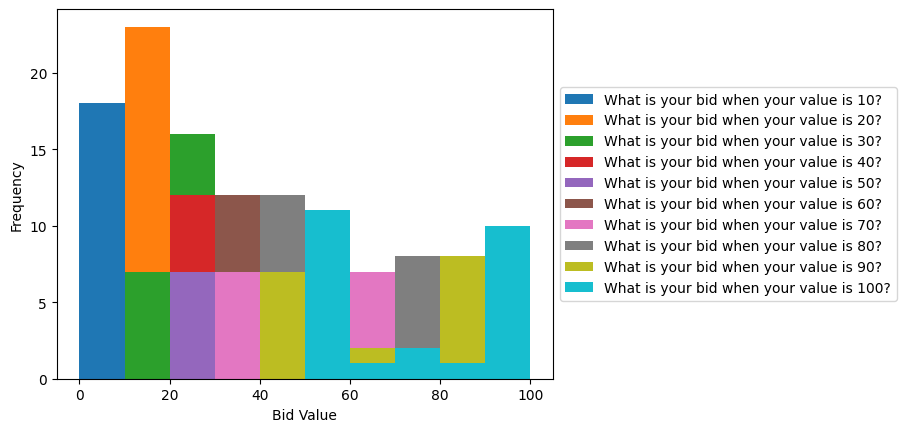

In [5]:
fig = plt.figure()
ax = competitor_df.plot.hist() 

ax.set_xlabel("Bid Value")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Calculate your winning probability and expected utility with your bids submitted in Ex 1.2 for each of your values.**

In the presence of complete information about the competitor bid distribution, we can precisely compute our probability of winning with our bids for each of our values. Assuming we are competing against a single classmate whose value is drawn uniformly from {0,...,10}, our exact probability of winning with our bid can be computed as follows: 
- Pr[win] = Pr[win | bid=b]*Pr[bid=b]

Exact Calculation:
- Compute fraction of bid dataframe where your bid > competitor_bid

In [6]:
exact_win_probabilities = {}
exact_expected_utilities = {}
total_win_probability = 0
total_expected_utility = 0

for value, bid in bids.items():
  # compare bid to all possible competitor bids (random tiebreaks)
  win_mask = competitor_df.applymap(win_bid, your_bid=bid)

  # sum all wins & compute win probability/fraction
  num_wins = win_mask.sum().sum()
  win_prob = num_wins / competitor_df.size
  exact_win_probabilities[value] = win_prob

  # E[utility] = P(win)*(value-bid) + (1-P(win))*0
  expected_utility = win_prob * (value - bid)
  exact_expected_utilities[value] = expected_utility

  print(f"Value: {value} | Bid: {bid} | P[win]: {win_prob} | E[utility]: {expected_utility}")

  total_win_probability += win_prob
  total_expected_utility += expected_utility

# Compute total probability of winning & expected utility by aggregating the probabilities & utilities across values
total_win_probability /= 10
total_expected_utility /= 10

print(f"P[win]: {total_win_probability}")
print(f"E[utility]: {total_expected_utility}")



Value: 10 | Bid: 0 | P[win]: 0.004 | E[utility]: 0.04
Value: 20 | Bid: 11 | P[win]: 0.132 | E[utility]: 1.1880000000000002
Value: 30 | Bid: 16 | P[win]: 0.2 | E[utility]: 2.8000000000000003
Value: 40 | Bid: 21 | P[win]: 0.28 | E[utility]: 5.32
Value: 50 | Bid: 26 | P[win]: 0.352 | E[utility]: 8.448
Value: 60 | Bid: 31 | P[win]: 0.424 | E[utility]: 12.296
Value: 70 | Bid: 36 | P[win]: 0.5 | E[utility]: 17.0
Value: 80 | Bid: 41 | P[win]: 0.592 | E[utility]: 23.087999999999997
Value: 90 | Bid: 46 | P[win]: 0.656 | E[utility]: 28.864
Value: 100 | Bid: 51 | P[win]: 0.732 | E[utility]: 35.868
P[win]: 0.3872
E[utility]: 13.491200000000001


Aggregate those win probabilities & expected utilities to compute overall win probability

Monte Carlo:
- Sample many times from competitor bid distribution
- Compute win probabilities from sampled distribution

Simulation: 2 approaches
- compute Monte Carlo estimate for each of our values from {10,...,100}, then aggregate to get P[win] & E[utility]
- include sampling of our value in Monte Carlo method i.e. compute P[win] & E[utility] directly w/o computing P[win|bid]


In [7]:
# CONFIGURE SAMPLE SIZE
num_samples_list = [46, 184, 737] #[30, 150, 750, 1000, 10000]

estimated_win_probs = {}
estimated_expected_utilities = {}
# estimated_total_win_probability = 0
# estimated_total_expected_utility = 0

for num_samples in num_samples_list:
  print(f"Sample size: {num_samples}")
  estimated_total_win_probability = 0
  estimated_total_expected_utility = 0
  
  for value, bid in bids.items():
    # list of sampled competitor bids
    sampled_competitor_bids = []
    
    # sample num_samples from competitor bid dist.
    for i in range(num_samples):
      # from competitor dist, get random col & random value from that col
      competitor_val_col = np.random.randint(0, len(competitor_df.columns))
      competitor_bid = random.choice(competitor_df.iloc[:, competitor_val_col].tolist())

      # append to sampled competitor bids
      sampled_competitor_bids.append(competitor_bid)
      
    # compute win probability against sampled competitor dist.
    win_mask = [win_bid(x, bid) for x in sampled_competitor_bids]
    num_wins = sum(win_mask)
    win_prob = num_wins / num_samples
    estimated_win_probs[value] = win_prob

    # compute expected utility from win probability
    expected_utility = win_prob * (value - bid)
    estimated_expected_utilities[value] = expected_utility

    # update aggregate P[win] & E[utility]
    estimated_total_win_probability += win_prob
    estimated_total_expected_utility += expected_utility

    # compute differences from exact calculations
    win_prob_diff = abs(win_prob - exact_win_probabilities[value])
    expected_utility_diff = abs(expected_utility - exact_expected_utilities[value])

    print(f"  Value: {value} | Bid: {bid} | P[win]: {win_prob:.3f} ({win_prob_diff:.3f}) | E[utility]: {expected_utility:.3f} ({expected_utility_diff:.3f})" )

  estimated_total_win_probability /= 10
  estimated_total_expected_utility /= 10
  total_win_prob_diff = abs(estimated_total_win_probability - total_win_probability)
  total_expected_utility_diff = abs(estimated_total_expected_utility - total_expected_utility)
  print(f"  P[win]: {estimated_total_win_probability:.3f} ({total_win_prob_diff:.3f}) | E[utility]: {estimated_total_expected_utility:.3f} ({total_expected_utility_diff:.3f})" )


Sample size: 46
  Value: 10 | Bid: 0 | P[win]: 0.000 (0.004) | E[utility]: 0.000 (0.040)
  Value: 20 | Bid: 11 | P[win]: 0.087 (0.045) | E[utility]: 0.783 (0.405)
  Value: 30 | Bid: 16 | P[win]: 0.130 (0.070) | E[utility]: 1.826 (0.974)
  Value: 40 | Bid: 21 | P[win]: 0.217 (0.063) | E[utility]: 4.130 (1.190)
  Value: 50 | Bid: 26 | P[win]: 0.413 (0.061) | E[utility]: 9.913 (1.465)
  Value: 60 | Bid: 31 | P[win]: 0.348 (0.076) | E[utility]: 10.087 (2.209)
  Value: 70 | Bid: 36 | P[win]: 0.587 (0.087) | E[utility]: 19.957 (2.957)
  Value: 80 | Bid: 41 | P[win]: 0.761 (0.169) | E[utility]: 29.674 (6.586)
  Value: 90 | Bid: 46 | P[win]: 0.674 (0.018) | E[utility]: 29.652 (0.788)
  Value: 100 | Bid: 51 | P[win]: 0.674 (0.058) | E[utility]: 33.022 (2.846)
  P[win]: 0.389 (0.002) | E[utility]: 13.904 (0.413)
Sample size: 184
  Value: 10 | Bid: 0 | P[win]: 0.000 (0.004) | E[utility]: 0.000 (0.040)
  Value: 20 | Bid: 11 | P[win]: 0.120 (0.012) | E[utility]: 1.076 (0.112)
  Value: 30 | Bid: 16 

We do see P[win] & E[utility] trend towards their exact value, but the trend is weak. Even with small sample sizes, the estimates of probability & expected utility are close to their true value. This may be partially due to the discrete bid space we are operating under.

**Compute the optimal bids which maximizes your expected utility given the distribution of opponent bids and each of your possible values.**

Exact computation: for each value, compute bid that maximizes E[utility] = P[win]*(value-bid)

- for any given value, you can bid any amount from [0, value] (assume discrete in 0.01 increments)
- find bid amount within [0, value] which maximizes E[utility]

In [8]:
optimal_bids = {} # value : optimal_bid
exact_optimal_utilties = {} # value : optimal_utility

# loop through values (10,20,...100)
for value, bid in bids.items():
  optimal_bid = 0
  max_utility = 0

  #   loop thru possible bids [0, value], assume discrete
  for potential_bid_int in range(value*100):
    potential_bid=potential_bid_int/100
    #     compute P[win|bid] - this is what changes in expected utility calculation, essentially this is the thing to maximize
    win_mask = competitor_df.applymap(win_bid, your_bid=potential_bid)
    num_wins = win_mask.sum().sum()
    win_prob = num_wins / competitor_df.size

    #     compute E[utility] = P[win|bid]*(value-bid)
    expected_utility = win_prob * (value - potential_bid)

    #     store bid that maximizes E[utility] to ideal bid
    if expected_utility > max_utility:
      max_utility = expected_utility
      optimal_bid = potential_bid

  optimal_bids[value] = optimal_bid
  exact_optimal_utilties[value] = max_utility
  bid_value_ratio = optimal_bid / value*1.0
  print(f"Value: {value} | Optimal bid: {optimal_bid} | Ratio: {bid_value_ratio:.3f} | E[utility]: {max_utility:.3f}")

print(optimal_bids)

Value: 10 | Optimal bid: 5.1 | Ratio: 0.510 | E[utility]: 0.118
Value: 20 | Optimal bid: 11.01 | Ratio: 0.550 | E[utility]: 1.331
Value: 30 | Optimal bid: 11.01 | Ratio: 0.367 | E[utility]: 2.811
Value: 40 | Optimal bid: 21.01 | Ratio: 0.525 | E[utility]: 5.621
Value: 50 | Optimal bid: 25.1 | Ratio: 0.502 | E[utility]: 8.765
Value: 60 | Optimal bid: 31.01 | Ratio: 0.517 | E[utility]: 12.988
Value: 70 | Optimal bid: 41.01 | Ratio: 0.586 | E[utility]: 17.510
Value: 80 | Optimal bid: 41.01 | Ratio: 0.513 | E[utility]: 23.550
Value: 90 | Optimal bid: 41.01 | Ratio: 0.456 | E[utility]: 29.590
Value: 100 | Optimal bid: 51.01 | Ratio: 0.510 | E[utility]: 36.449
{10: 5.1, 20: 11.01, 30: 11.01, 40: 21.01, 50: 25.1, 60: 31.01, 70: 41.01, 80: 41.01, 90: 41.01, 100: 51.01}


From results above, it seems like the best bidding strategy would be to bid approximately half of your value.

Monte Carlo: compute optimal bids
- maximize P[win|bid] against sampled distribution

In [9]:
# Random sample from domain many times (with replacement)
num_samples = 100000

estimated_optimal_bids = {} # value : optimal_bid
estimated_optimal_utility = {} # value : optimal_utility

for value, bid in bids.items():
  optimal_bid = 0
  max_utility = 0

  sampled_competitor_bids = []
  # get competitor bid dist. from repeated sampling
  for i in range(num_samples):
    # get random column
    competitor_val_col = np.random.randint(0, len(competitor_df.columns))
    # get random value from that column
    competitor_bid = random.choice(competitor_df.iloc[:, competitor_val_col].tolist())
    sampled_competitor_bids.append(competitor_bid)

  # check possible bids from [0, value] - DISCRETE FOR NOW
  for potential_bid_int in range(value*100):
    potential_bid = potential_bid_int/100
    # compute win probability
    win_mask = [win_bid(x, potential_bid) for x in sampled_competitor_bids]
    num_wins = sum(win_mask)
    win_prob = num_wins / num_samples
    expected_utility = win_prob*(value-potential_bid)

    if expected_utility > max_utility:
      max_utility = expected_utility
      optimal_bid = potential_bid
    estimated_win_probs[value] = win_prob

  # compute expected utility from win probability
  estimated_optimal_bids[value] = optimal_bid
  estimated_optimal_utility[value] = max_utility

  bid_value_ratio = optimal_bid / value*1.0
  print(f"Value: {value} | Optimal bid: {optimal_bid} | Ratio: {bid_value_ratio:.3f} | E[utility]: {max_utility:.3f}")

print(estimated_optimal_bids)

Value: 10 | Optimal bid: 5.11 | Ratio: 0.511 | E[utility]: 0.116
Value: 20 | Optimal bid: 11.01 | Ratio: 0.550 | E[utility]: 1.348
Value: 30 | Optimal bid: 11.01 | Ratio: 0.367 | E[utility]: 2.779
Value: 40 | Optimal bid: 21.01 | Ratio: 0.525 | E[utility]: 5.609
Value: 50 | Optimal bid: 25.11 | Ratio: 0.502 | E[utility]: 8.774
Value: 60 | Optimal bid: 31.01 | Ratio: 0.517 | E[utility]: 13.004
Value: 70 | Optimal bid: 31.01 | Ratio: 0.443 | E[utility]: 17.493
Value: 80 | Optimal bid: 41.01 | Ratio: 0.513 | E[utility]: 23.538
Value: 90 | Optimal bid: 41.01 | Ratio: 0.456 | E[utility]: 29.444
Value: 100 | Optimal bid: 51.01 | Ratio: 0.510 | E[utility]: 36.507
{10: 5.11, 20: 11.01, 30: 11.01, 40: 21.01, 50: 25.11, 60: 31.01, 70: 31.01, 80: 41.01, 90: 41.01, 100: 51.01}


**Compare the utility you obtained to the optimal utility you could have obtained.  Can you conclude anything about a good strategy in this auction?**

Exact compuation: E[utility | our bids] vs. E[utility | optimal bids]

In [12]:
sum_exact_utilities = 0
sum_exact_optimal_utilities = 0

for value, bid in bids.items():
    print(f"Value: {value} | Your utility: {exact_expected_utilities[value]:.3f} | Optimal utility: {exact_optimal_utilties[value]:.3f}")
    sum_exact_utilities += exact_expected_utilities[value]
    sum_exact_optimal_utilities += exact_optimal_utilties[value]

pct_diff = abs(sum_exact_utilities-sum_exact_optimal_utilities)/sum_exact_optimal_utilities
print(f"Percent difference: {pct_diff:.3f}")


Value: 10 | Your utility: 0.040 | Optimal utility: 0.118
Value: 20 | Your utility: 1.188 | Optimal utility: 1.331
Value: 30 | Your utility: 2.800 | Optimal utility: 2.811
Value: 40 | Your utility: 5.320 | Optimal utility: 5.621
Value: 50 | Your utility: 8.448 | Optimal utility: 8.765
Value: 60 | Your utility: 12.296 | Optimal utility: 12.988
Value: 70 | Your utility: 17.000 | Optimal utility: 17.510
Value: 80 | Your utility: 23.088 | Optimal utility: 23.550
Value: 90 | Your utility: 28.864 | Optimal utility: 29.590
Value: 100 | Your utility: 35.868 | Optimal utility: 36.449
Percent difference: 0.028


Monte Carlo estimate: E[utility | our bids] vs. E[utility | optimal bids]
- compare utilities computed directly from simulated class bid distribution produced by repeated random samples

In [13]:
sum_estimated_utilities = 0
sum_estimated_optimal_utilities = 0

for value, bid in bids.items():
    print(f"Value: {value} | Your utility: {estimated_expected_utilities[value]:.3f} | Optimal utility: {estimated_optimal_utility[value]:.3f}")
    sum_estimated_utilities += estimated_expected_utilities[value]
    sum_estimated_optimal_utilities += estimated_optimal_utility[value]

estimated_pct_diff = abs(sum_estimated_utilities-sum_estimated_optimal_utilities)/sum_estimated_optimal_utilities
print(f"Percent difference: {estimated_pct_diff:.3f}")

Value: 10 | Your utility: 0.041 | Optimal utility: 0.116
Value: 20 | Your utility: 1.270 | Optimal utility: 1.348
Value: 30 | Your utility: 2.469 | Optimal utility: 2.779
Value: 40 | Your utility: 5.388 | Optimal utility: 5.609
Value: 50 | Your utility: 8.109 | Optimal utility: 8.774
Value: 60 | Your utility: 13.024 | Optimal utility: 13.004
Value: 70 | Your utility: 16.516 | Optimal utility: 17.493
Value: 80 | Your utility: 22.225 | Optimal utility: 23.538
Value: 90 | Your utility: 28.716 | Optimal utility: 29.444
Value: 100 | Your utility: 35.902 | Optimal utility: 36.507
Percent difference: 0.036
